Simple Linear Regression Results:
Feature: area
Coefficient: 425.7298
Intercept: 2512254.2640
MAE: 1474748.1338
MSE: 3675286604768.1851
R²: 0.2729


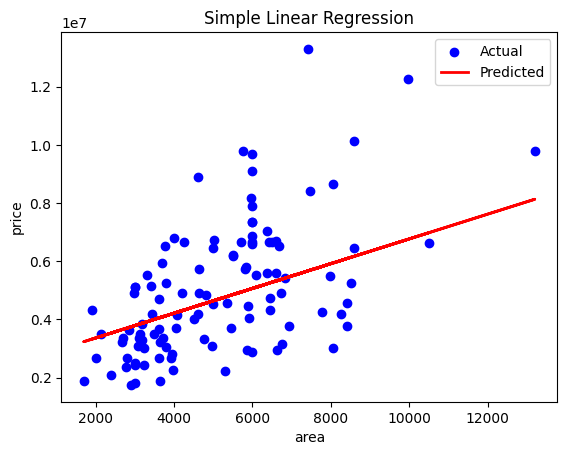

Multiple Linear Regression Results:
Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Coefficients: [680058.42414123 112973.18562909 565408.61793601 424354.81176353
 288348.7726677 ]
Intercept: 4706527.3853
MAE: 1127483.3523
MSE: 2292721545725.3662
R²: 0.5464


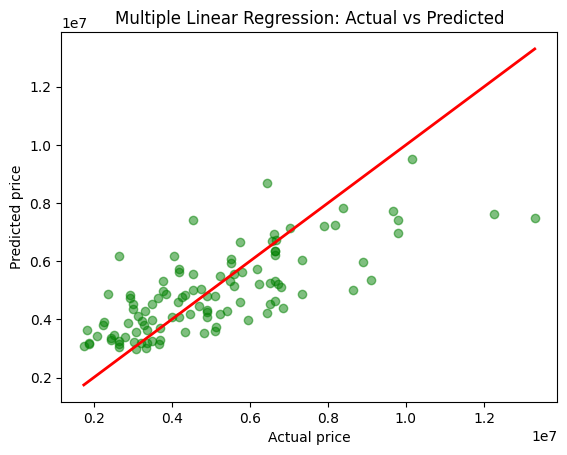

area: 680058.4241
bedrooms: 112973.1856
bathrooms: 565408.6179
stories: 424354.8118
parking: 288348.7727


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Housing.csv')

feature_simple = 'area'
target = 'price'

X_simple = df[[feature_simple]].values
y_simple = df[target].values.reshape(-1,1)

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)

mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("Simple Linear Regression Results:")
print(f"Feature: {feature_simple}")
print(f"Coefficient: {model_simple.coef_[0][0]:.4f}")
print(f"Intercept: {model_simple.intercept_[0]:.4f}")
print(f"MAE: {mae_simple:.4f}")
print(f"MSE: {mse_simple:.4f}")
print(f"R²: {r2_simple:.4f}")

plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel(feature_simple)
plt.ylabel(target)
plt.legend()
plt.show()

numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_multi = df[numeric_features].values
y_multi = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train)
y_pred_multi = model_multi.predict(X_test_scaled)

mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Multiple Linear Regression Results:")
print(f"Features: {numeric_features}")
print(f"Coefficients: {model_multi.coef_}")
print(f"Intercept: {model_multi.intercept_:.4f}")
print(f"MAE: {mae_multi:.4f}")
print(f"MSE: {mse_multi:.4f}")
print(f"R²: {r2_multi:.4f}")

plt.scatter(y_test, y_pred_multi, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.xlabel('Actual ' + target)
plt.ylabel('Predicted ' + target)
plt.show()

for feature, coef in zip(numeric_features, model_multi.coef_):
    print(f"{feature}: {coef:.4f}")
